<a href="https://colab.research.google.com/github/DAOTHANHTRONG/BAIBAOCAOGIUAKY/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Mục mới

In [ ]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Money/',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 220 images belonging to 11 classes.


In [ ]:
training.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(11,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
7/7 [==============================] - 49s 5s/step - loss: 3.2039 - accuracy: 0.1409
Epoch 2/20
7/7 [==============================] - 4s 614ms/step - loss: 2.2871 - accuracy: 0.1409
Epoch 3/20
7/7 [==============================] - 3s 413ms/step - loss: 2.0437 - accuracy: 0.2227
Epoch 4/20
7/7 [==============================] - 3s 419ms/step - loss: 1.8700 - accuracy: 0.3636
Epoch 5/20
7/7 [==============================] - 4s 585ms/step - loss: 1.7265 - accuracy: 0.4136
Epoch 6/20
7/7 [==============================] - 3s 437ms/step - loss: 1.6140 - accuracy: 0.4136
Epoch 7/20
7/7 [==============================] - 3s 422ms/step - loss: 1.3259 - accuracy: 0.6318
Epoch 8/20
7/7 [==============================] - 3s 414ms/step - loss: 1.2691 - accuracy: 0.5318
Epoch 9/20
7/7 [==============================] - 4s 510ms/step - loss: 1.1782 - accuracy: 0.6182
Epoch 10/20
7/7 [==============================] - 3s 419ms/step - loss: 1.1028 - accuracy: 0.6364
Epoch 11/20
7/7 [====

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.19347721338272095
Train Accuracy 0.918181836605072


In [ ]:
# Lưu 
model.save("/content/drive/MyDrive/Money.h5")

In [ ]:
model_1=load_model('/content/drive/MyDrive/Money.h5')

1/1 [==============================] - 0s 223ms/step
10K


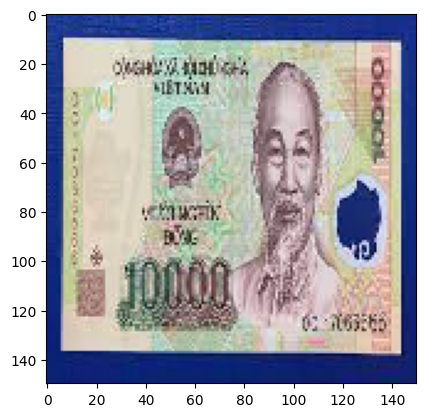

In [ ]:
folder="/content/10000.jpg"
img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['1K','10K','100K','200','2k','20K','200K','500','5k','50K','500K']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 19ms/step
20K


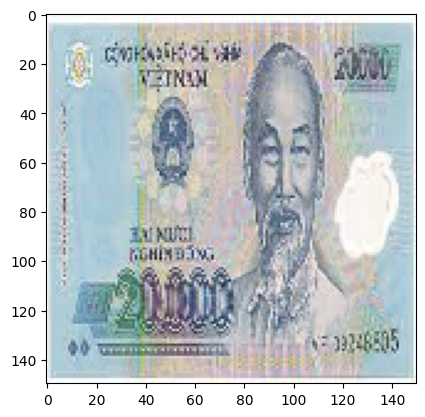

In [ ]:
folder="/content/20000.jpg"
img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['1K','10K','100K','200','2k','20K','200K','500','5k','50K','500K']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 22ms/step
50K


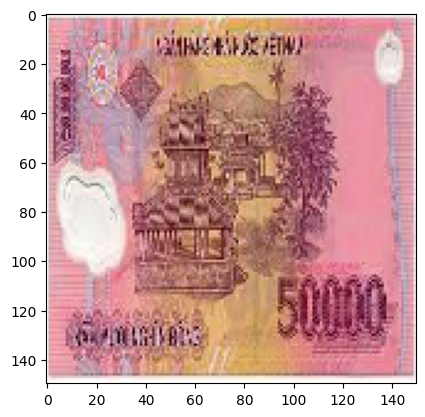

In [ ]:
folder="/content/50000.jpg"
img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['1K','10K','100K','200','2k','20K','200K','500','5k','50K','500K']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 20ms/step
100K


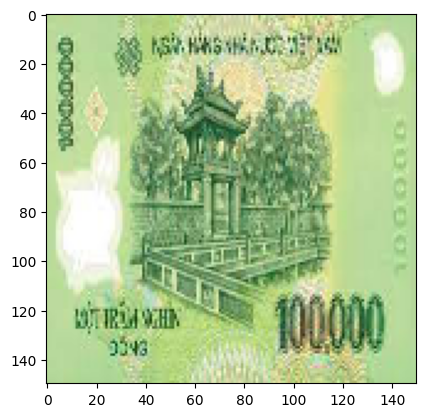

In [ ]:
folder="/content/100000.jpg"
img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['1K','10K','100K','200','2k','20K','200K','500','5k','50K','500K']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 29ms/step
500K


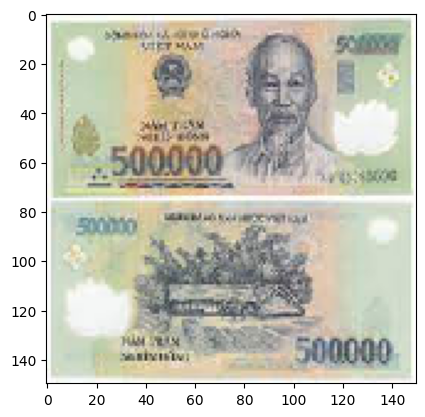

In [ ]:
folder="/content/500000.jpg"
img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['1K','10K','100K','200','2k','20K','200K','500','5k','50K','500K']
print(class_name[result])
plt.show()

# Mục mới

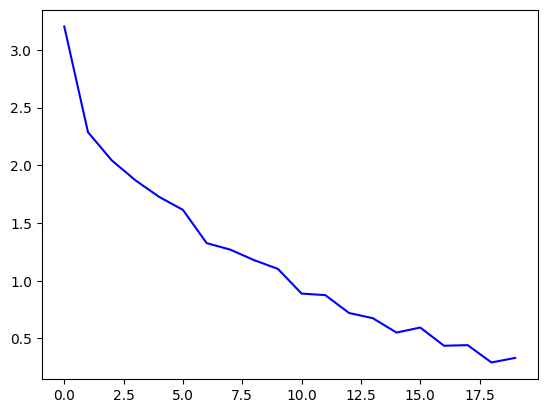

In [ ]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()  